# Project 3 
#### Computational Social Science, Fall 2020
#### Team 2: Elizabeth Breen, Madeleine Parker, Mahader Tamene


In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore')
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot




# Make sure to import other libraries that will be necessary for training models!

In [2]:
# Inspections Data 2011 - 2013
chicago_inspections_2011_to_2013 = pd.read_csv("data/Chicago Inspections 2011-2013.csv")

# Inspections Data 2014
chicago_inspections_2014 = pd.read_csv("data/Chicago Inspections 2014.csv")

In [3]:
# Look at the inspections data
chicago_inspections_2011_to_2013.head()

,Inspection_ID,Inspection_Date,DBA_Name,AKA_Name,License,Facility_Type,Risk,Address,City,State,Zip,Inspection_Type,Results,Latitude,Longitude,Location,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pass_flag,fail_flag,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ID,LICENSE_ID,ACCOUNT_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,WARD,PRECINCT,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_CODE,LICENSE_DESCRIPTION,BUSINESS_ACTIVITY_ID,BUSINESS_ACTIVITY,LICENSE_NUMBER,APPLICATION_TYPE,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_STATUS,LATITUDE,LONGITUDE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound
0,269961,2013-01-31,SEVEN STAR,SEVEN STAR,30790,Grocery Store,Risk 3 (Low),3352 N BROADWAY,CHICAGO,IL,60657.0,Canvass,Pass,41.943359,-87.644999,"(41.943359344775146, -87.64499875300952)",Other,0,0,2,1,0,0,0,0,0,2.0,1,30790-20110416,2081412.0,63759.0,VIRGINIA DELA ROSA,SEVEN STAR,3352 N BROADWAY 1,CHICAGO,IL,60657.0,44.0,33.0,44-33,19.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,30790.0,RENEW,2011-04-16,2013-04-15,AAI,41.943359,-87.644999,2002-02-16,2015-04-15,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0
1,507211,2011-10-18,PANERA BREAD,PANERA BREAD,1475890,Restaurant,Risk 1 (High),6059 N LINCOLN AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.991919,-87.709631,"(41.99191947239194, -87.70963133440333)",Restaurant,0,0,3,1,0,0,0,0,0,2.0,1,1475890-20110416,2081695.0,207283.0,"PANERA, LLC",PANERA BREAD,6059 N LINCOLN AVE C,CHICAGO,IL,60659.0,50.0,23.0,50-23,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1475890.0,RENEW,2011-04-16,2013-04-15,AAI,41.991919,-87.709631,2004-05-05,2019-04-15,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0
2,507212,2011-10-18,LITTLE QUIAPO RESTAURANT,LITTLE QUIAPO RESTAURANT,1740130,Restaurant,Risk 1 (High),6259 N MCCORMICK RD,CHICAGO,IL,60659.0,Canvass,Fail,41.995632,-87.712707,"(41.99563177556418, -87.71270678169132)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1740130-20110216,2070145.0,3107.0,ENELITA GARCIA,LITTLE QUIAPO RESTAURANT,6259 N MCCORMICK RD,CHICAGO,IL,60659.0,50.0,25.0,50-25,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1740130.0,RENEW,2011-02-16,2013-02-15,AAI,41.995632,-87.712707,2007-03-22,2017-02-15,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0
3,507216,2011-10-19,SERGIO'S TAQUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA,1447363,Restaurant,Risk 1 (High),3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.982933,-87.710982,"(41.982933189164974, -87.71098225381141)",Restaurant,0,0,6,1,0,0,0,0,0,2.0,1,1447363-20110216,2071895.0,270993.0,SERGIO'S TAZUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA INC.,3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,39.0,48.0,39-48,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1447363.0,RENEW,2011-02-16,2013-02-15,AAI,41.982933,-87.710982,2003-12-31,2019-02-15,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0
4,507219,2011-10-20,TARGET STORE # T-2079,TARGET,1679459,Restaurant,Risk 2 (Medium),2112 W PETERSON AVE,CHICAGO,IL,60659.0,Canvass,Fail,41.990729,-87.682979,"(41.99072921796059, -87.68297945359863)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1679459-20100216,2009972.0,15538.0,TARGET CORPORATION,TARGET STORE # T-2079,2112 W PETERSON AVE,CHICAGO,IL,60659.0,40.0,18.0,40-18,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1679459.0,RENEW,

In [4]:
# List column names
chicago_inspections_2011_to_2013.columns
#len(chicago_inspections_2011_to_2013.columns)
# 75 total columns

Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'AKA_Name', 'License',
       'Facility_Type', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Inspection_Type', 'Results', 'Latitude', 'Longitude', 'Location',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pass_flag', 'fail_flag', 'pastFail', 'pastCritical', 'pastSerious',
       'pastMinor', 'timeSinceLast', 'firstRecord', 'ID', 'LICENSE_ID',
       'ACCOUNT_NUMBER', 'LEGAL_NAME', 'DOING_BUSINESS_AS_NAME', 'ADDRESS',
       'CITY', 'STATE', 'ZIP_CODE', 'WARD', 'PRECINCT', 'WARD_PRECINCT',
       'POLICE_DISTRICT', 'LICENSE_CODE', 'LICENSE_DESCRIPTION',
       'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY', 'LICENSE_NUMBER',
       'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'minDate', 'maxDate', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods',

In [5]:
# Drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2011_to_2013.drop(columns = ['AKA_Name', 
                                                 'License',
                                                'Address',
                                                'City',
                                                'State',
                                                'Zip',
                                                'Latitude',
                                                'Longitude',
                                                'Location',
                                                'ID',
                                                'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                'ACCOUNT_NUMBER',
                                                'LEGAL_NAME',
                                                'DOING_BUSINESS_AS_NAME',
                                                'ADDRESS',
                                                'CITY',
                                                'STATE',
                                                'ZIP_CODE',
                                                'WARD',
                                                'PRECINCT',
                                                'LICENSE_CODE',
                                                'BUSINESS_ACTIVITY_ID',
                                                'BUSINESS_ACTIVITY',
                                                'LICENSE_NUMBER',
                                                'LATITUDE',
                                                'LONGITUDE',
                                                'pass_flag',
                                                'fail_flag',
                                                'criticalCount', 
                                                'seriousCount',
                                                'minorCount',
                                                'criticalFound'],inplace = True)

chicago_inspections_2011_to_2013.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [6]:
# Convert the Inspection Date to a datetime format
chicago_inspections_2011_to_2013['Inspection_Date'] = pd.to_datetime(chicago_inspections_2011_to_2013['Inspection_Date'], infer_datetime_format=True)  

In [7]:
#len(chicago_inspections_2011_to_2013.columns)
#38 columns

## Visualization

<b> What do inspections look like over time? </b>

At first glance, the values seem to fluctuate with no real pattern. We do see dips around Jan and July of each year and peaks in April and October.  2013 also has overall more inspections than 2012.

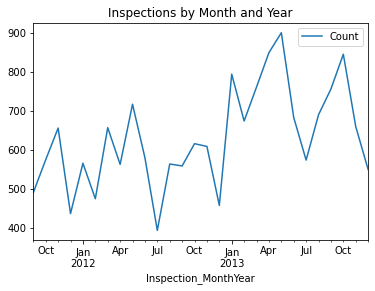

In [8]:
# Visualize Inspections Over Time
chicago_inspections_2011_to_2013['Inspection_MonthYear'] = chicago_inspections_2011_to_2013['Inspection_Date'].dt.to_period('M')
counts_by_day = chicago_inspections_2011_to_2013.groupby('Inspection_MonthYear').count().rename(columns = {'Facility_Type': 'Count'})['Count'].reset_index()
counts_by_day.set_index(["Inspection_MonthYear"], inplace = True)
counts_by_day.plot(title = "Inspections by Month and Year")

<b>What do the results look like?</b>

A good majority of the facilities passed inspection (68%), with few failing (20%) and a small percentage passing w/ conditions (12%).

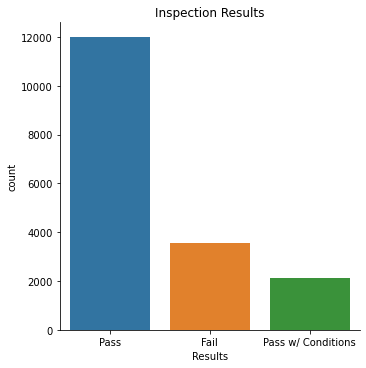

In [9]:

# Inspection Results
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count")

plt.title("Inspection Results")
plt.show()

<b> What if we separate by facility type? </b>

Restaurants are the most common facility type across all inspection results.

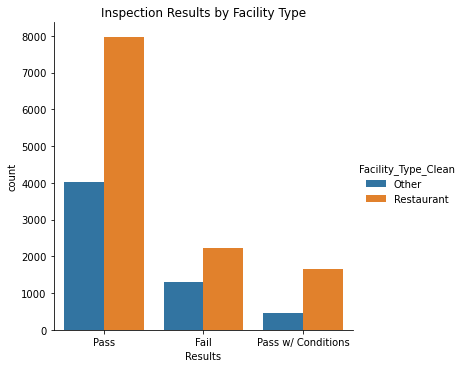

In [10]:
# Inspection Results by Facility Type (Restaurant or Not)
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count",
           hue = 'Facility_Type_Clean')

plt.title("Inspection Results by Facility Type")
plt.show()

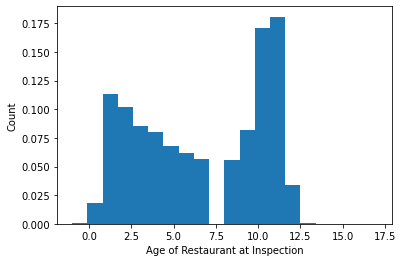

In [11]:
# Is there a trend in age of restaurant vs # of failures?

age = round(chicago_inspections_2011_to_2013['ageAtInspection'])

chicago_inspections_2011_to_2013['age'] = age


x = chicago_inspections_2011_to_2013['age']
plt.hist(x, density=True, bins=20)  # `density=False` would make counts
plt.ylabel('Count')
plt.xlabel('Age of Restaurant at Inspection');

In [12]:
# recode into 3 age bins, new, mid, old

def age_groups(series):
    if series < 5:
        return "young"
    elif 5 <= series < 9:
        return "middle"
    elif 9 <= series:
        return "old"
    
chicago_inspections_2011_to_2013['age_groups'] = chicago_inspections_2011_to_2013['age'].apply(age_groups)
chicago_inspections_2011_to_2013['age_groups'].value_counts(sort=False)
    
    

young     5684
middle    3440
old       6640
Name: age_groups, dtype: int64

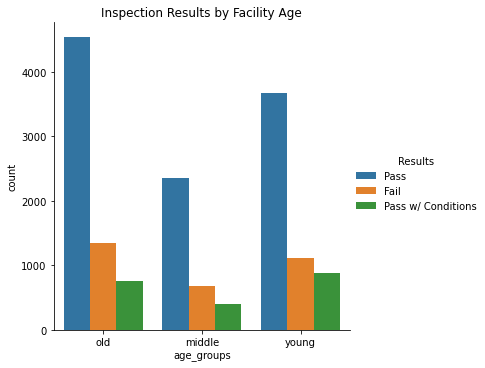

In [13]:
# Inspection Results by Age of Facility
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "age_groups",
           kind = "count",
           hue = 'Results')

plt.title("Inspection Results by Facility Age")
plt.show()



## Preprocess Data

In [14]:
# Drop datetime info
chicago_inspections_2011_to_2013 = chicago_inspections_2011_to_2013.dropna().drop(['Inspection_Date',
                                      'minDate',
                                      'maxDate',
                                      'Inspection_MonthYear'],
                                      axis = 1)

In [15]:
# Set target variable. 
y = chicago_inspections_2011_to_2013['Results']
## Comment out the following code if you don't want to binarize the target variable
y = y.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y = lb_style.fit_transform(y)
# Recode 0s and 1s so 1s are "Fail"
y = np.where(y == 1, 0 ,1)

# All other features in X
X = chicago_inspections_2011_to_2013.drop(columns = ['Results'])
X = pd.get_dummies(X)

In [16]:
X.head()

pastFail  pastCritical  \
Inspection_ID DBA_Name                                               
269961        SEVEN STAR                           0             0   
507211        PANERA BREAD                         0             0   
507212        LITTLE QUIAPO RESTAURANT             0             0   
507216        SERGIO'S TAQUERIA PIZZA INC.         0             0   
507219        TARGET STORE # T-2079                0             0   

                                            pastSerious  pastMinor  \
Inspection_ID DBA_Name                                               
269961        SEVEN STAR                              0          0   
507211        PANERA BREAD                            0          0   
507212        LITTLE QUIAPO RESTAURANT                0          0   
507216        SERGIO'S TAQUERIA PIZZA INC.            0          0   
507219        TARGET STORE # T-2079                   0          0   

                                            timeSinceLast  firstRecord  \
Inspection_ID DBA_Name                                                   
269961        SEVEN STAR                              2.0            1   
507211        PANERA BREAD                            2.0            1   
507212        LITTLE QUIAPO RESTAURANT                2.0            1   
507216        SERGIO'S TAQUERIA PIZZA INC.            2.0            1   
507219        TARGET STORE # T-2079                   2.0            1   

                                            POLICE_DISTRICT  ageAtInspection  \
Inspection_ID DBA_Name                                                         
269961        SEVEN STAR                               19.0        10.964384   
507211        PANERA BREAD                             24.0         7.457534   
507212        LITTLE QUIAPO RESTAURANT                 17.0         4.578082   
507216        SERGIO'S TAQUERIA PIZZA INC.             17.0         7.805479   
507219        TARGET STORE # T-2079                    24.0         5.290411   

                                            consumption_on_premises_incidental_activity  \
Inspection_ID DBA_Name                                                                    
269961        SEVEN STAR                                                              0   
507211        PANERA BREAD                                                            0   
507212        LITTLE QUIAPO RESTAURANT                                                0   
507216        SERGIO'S TAQUERIA PIZZA INC.                                            0   
507219        TARGET STORE # T-2079                                                   0   

                                            tobacco  package_goods  \
Inspection_ID DBA_Name                                               
269961        SEVEN STAR                          1              0   
507211        PANERA BREAD                        0              0   
507212        LITTLE QUIAPO RESTAURANT            0              0   
507216        SERGIO'S TAQUERIA PIZZA INC.        0              0   
507219        TARGET STORE # T-2079               0              1   

                                            outdoor_patio  \
Inspection_ID DBA_Name                                      
269961        SEVEN STAR                                0   
507211        PANERA BREAD                              0   
507212        LITTLE QUIAPO RESTAURANT                  0   
507216        SERGIO'S TAQUERIA PIZZA INC.              0   
507219        TARGET STORE # T-2079                     0   

                                            public_place_of_amusement  \
Inspection_ID DBA_Name                                                  
269961        SEVEN STAR                                            0   
507211        PANERA BREAD                                          0   
507212        LITTLE QUIAPO RESTAURANT                              0   
507216        SERGIO'S TAQUERIA PIZZA INC.                  

### Look for correlations

In [17]:
chicago_inspections_2011_to_2013.corr(method='pearson', min_periods=1)

,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,POLICE_DISTRICT,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,age
pastFail,1.000000,0.279907,0.774943,0.370640,-0.319734,-0.356773,0.019537,0.063618,0.028218,-0.024086,-0.028876,0.015291,0.013804,-0.030412,-0.038240,0.002491,-0.000265,-0.025197,-0.007206,-0.006469,0.010965,-0.003179,-0.042200,0.013578,0.027146,0.027364,0.004176,0.063026
pastCritical,0.279907,1.000000,0.313040,0.325807,-0.217906,-0.261541,0.041286,0.043256,0.013402,-0.033215,-0.014576,0.011069,0.007356,-0.013769,-0.034756,-0.006850,-0.005204,-0.021757,0.004578,-0.008971,0.009329,0.016216,-0.035695,0.018796,0.014806,-0.011436,0.023169,0.042173
pastSerious,0.774943,0.313040,1.000000,0.410094,-0.305562,-0.365730,0.025437,0.054494,0.024672,-0.022797,-0.017841,0.009254,0.015981,-0.031086,-0.039261,-0.016038,-0.005063,-0.025875,-0.008620,-0.009020,0.012799,0.001241,-0.053632,0.023330,0.032342,0.020384,0.027281,0.054003
pastMinor,0.370640,0.325807,0.410094,1.000000,-0.725742,-0.828602,0.022207,0.162585,0.032901,-0.073644,-0.040499,0.007485,0.004168,-0.081263,-0.083594,-0.005138,-0.000950,-0.051969,0.004860,-0.012303,0.007173,-0.008930,-0.067570,0.036705,-0.033242,0.007690,-0.022529,0.161204
timeSinceLast,-0.319734,-0.217906,-0.305562,-0.725742,1.000000,0.904231,0.022324,-0.140851,-0.025910,0.113073,0.055232,-0.002182,0.000619,0.091839,0.079394,0.006609,-0.003161,0.062396,-0.000855,0.009077,-0.008515,0.036889,0.030688,-0.004858,0.079579,0.059509,0.080246,-0.140670
firstRecord,-0.356773,-0.261541,-0.365730,-0.828602,0.904231,1.000000,0.017136,-0.171433,-0.020656,0.107931,0.055717,-0.002295,-0.000257,0.099463,0.091944,0.010458,0.002249,0.063072,-0.000697,0.012669,-0.002827,0.019771,0.082166,-0.042371,0.069799,0.061113,0.066862,-0.170056
POLICE_DISTRICT,0.019537,0.041286,0.025437,0.022207,0.022324,0.017136,1.000000,0.019036,0.058356,-0.030443,0.004616,0.030362,0.020131,-0.016955,-0.016314,0.033367,0.029280,-0.008980,-0.018387,0.006053,-0.010020,0.018117,-0.020507,-0.006847,0.067322,0.143206,0.100916,0.018910
ageAtInspection,0.063618,0.043256,0.054494,0.162585,-0.140851,-0.171433,0.019036,1.000000,0.062877,0.047559,0.079227,0.008186,0.017748,0.037944,0.001114,0.067508,0.036390,-0.006086,0.002951,-0.031096,0.010530,0.011573,-0.010497,0.008439,-0.033194,-0.019431,-0.033107,0.996895
consumption_on_premises_incidental_activity,0.028218,0.013402,0.024672,0.032901,-0.025910,-0.020656,0.058356,0.062877,1.000000,-0.045482,-0.027439,0.304353,0.271189,-0.011431,-0.060194,-0.030413,0.057758,-0.040511,0.165447,0.008199,-0.007067,0.031425,-0.008798,-0.006341,0.033937,-0.086438,-0.006729,0.062391
tobacco,-0.024086,-0.033215,-0.022797,-0.073644,0.113073,0.107931,-0.030443,0.047559,-0.045482,1.000000,0.495342,-0.002486,0.027239,0.420337,-0.052968,0.023254,-0.021119,0.355764,-0.009487,-0.013672,0.014196,0.000112,-0.006407,0.022295,0.056906,0.104048,0.068242,0.048449


In [18]:
X.shape

(15311, 2042)

In [19]:
cor_matrix = X.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.70)]
X.drop(to_drop, axis=1, inplace=True)

## Fit Models & Validation

**Hint for Validation**: Try writing a for loop to use [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to check for accuracy, precision, recall and f1 across all of your models.

In [20]:
# Set seed
np.random.seed(10)

X_train, X_validate, y_train, y_validate = train_test_split(X, y, train_size = .75, test_size = .25, 
                                                           stratify = y)

### Model 1 - SVM

Support Vector Machines (SVM) is a supervised machine learning algorithm that employs a hyperplane to differentiate between different values of target classes. The hyperplane is optimized to maximize the distance between the classes during the training process, and it is then used to predict the classification of future data. SVM assumes the data are independent and identically distributed. SVM does well with high-dimensional datasets, an advantage, but requires a clearly delineated hyperparameter to predict well, which is not always possible to achieve. In this application, we found that after hyperparameter tuning, SVM was able to predict the validation set with very good accuracy. The downside of using SVM for this application was the extremely long computing time required.

#### Setting up the hyperparameter grid and SVM model

In [ ]:
# Warning: SVM takes a very long time to run. Confusion matrix output is included as screenshot

In [22]:
param_grid = {'C' : (50, 10, 1.0, 0.1, 0.01),
               'gamma' : ['scale', 'auto']}

# create a model
svm = SVC()

In [ ]:
svm_model = svm.fit(X_train, y_train.ravel())

svm_pred = svm_model.predict(X_validate)

In [24]:
def rmse(pred, actual):
    return np.sqrt(np.mean((pred - actual) ** 2))

#### Hyperparameter Tuning Using Grid Search for SVM

In [ ]:
svm_grid_reg = GridSearchCV(svm_model, param_grid, cv=3, iid=False)
svm_grid_reg.fit(X_train, y_train.ravel())

best_index = np.argmax(svm_grid_reg.cv_results_["mean_test_score"])
best_svm_pred = svm_grid_reg.best_estimator_.predict(X_validate)

print(svm_grid_reg.cv_results_["params"][best_index])
print('Best CV R^2:', max(svm_grid_reg.cv_results_["mean_test_score"]))
print('Validation R^2:', svm_grid_reg.score(X_validate, y_validate))
print('Validation RMSE', rmse(best_svm_pred, y_validate))



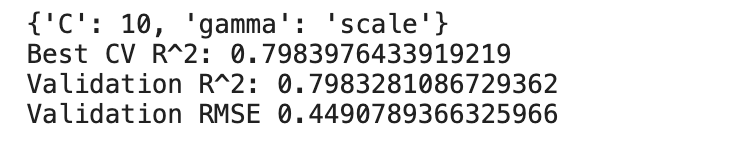


In [ ]:
svm_CV_score = cross_val_score(svm_grid_reg, X_validate, y_validate.ravel(), cv=3)



#### Finding best hyperparameters and re-fitting the model

In [ ]:
#new SVM model with optimal hyperparameters

# new model with optimal hyperparameters
svm = SVC() #need to update with hyperparameters once run tuning above

#fit a model
svm_model = svm.fit(X_train, y_train.ravel())

#use fit to predict
svm_pred = svm_model.predict(X_validate)

In [ ]:
cf_matrix = confusion_matrix(y_validate, svm_pred, normalize = "true")

df_cm = pd.DataFrame(cf_matrix, range(2),
                  range(2))

df_cm = df_cm.rename(index=str, columns={0: "Pass", 1: "Fail"})
df_cm.index = ["Pass", "Fail"]
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

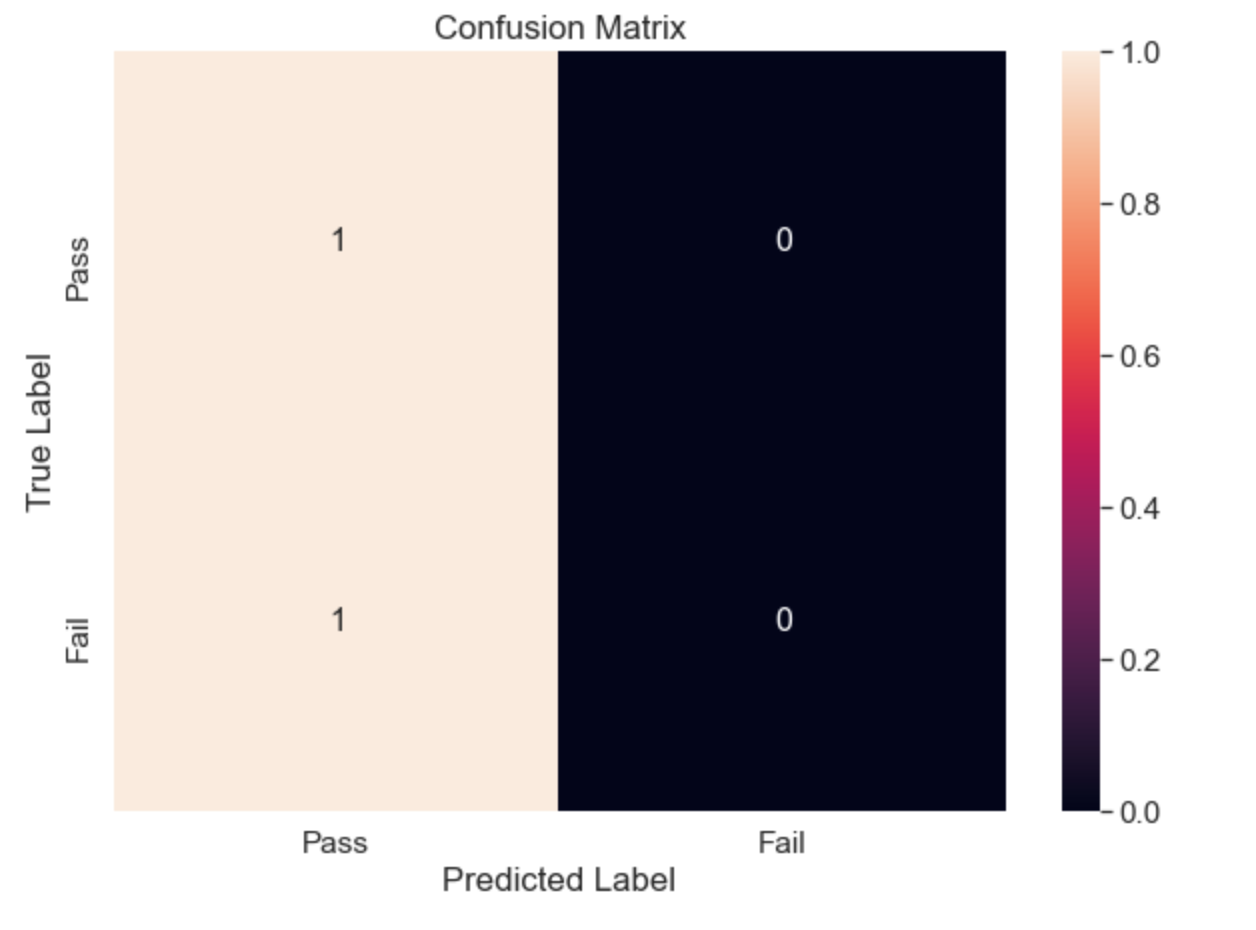


#### Validation for SVM

In [ ]:
range(len(svm_pred))

TP = 0
FP = 0
TN = 0
FN = 0

for i in range(len(svm_pred)): 
    if y_validate[i]==y_pred[i]==1:
       TP += 1
    if y_pred[i]==1 and y_validate[i]!=y_pred[i]:
       FP += 1
    if y_validate[i]==y_pred[i]==0:
       TN += 1
    if y_pred[i]==0 and y_pred[i]!=y_validate[i]:
       FN += 1

In [ ]:
accuracy = (TP + TN)/(TP + TN + FP + FN)
print("Accuracy is", accuracy)

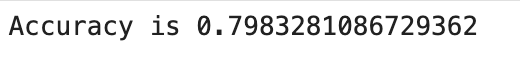

In [ ]:
precision = TP/(TP + FP)
print("Precision is", precision)

In [ ]:
# Precision returns a divide by zero error

In [ ]:
recall = TP/(TP + FN)
print("Recall is", recall)

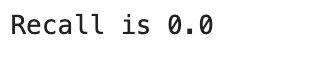

### Model 2 - Logistic Regression

Logistic regression is a general linear model used for classification (categorical) data.  Assumptions include independence of observations and non multicollinearity among independent features. Logistic regression is easier to implement than other models. A con is that log-odds coefficients are hard to interpret.

#### Hyperparameter Tuning Using Grid Search for Logistic Regression

Fit the logistic model.

In [21]:
# create a model
logit_reg = LogisticRegression()

# fit the model
logit_model = logit_reg.fit(X_train, y_train)

logit_pred = logit_model.predict(X_validate)

Using GridSearchCV to search for optimal hyperparameters

In [22]:
param_grid = {'penalty': ['l1', 'l2', 'elasticnet'],
             'C': np.arange(.1, 1, .1),
               'fit_intercept': ['True', 'False'],
             'solver': ['liblinear', 'saga']}

logit_grid = GridSearchCV(logit_model, param_grid, cv=3, iid=False)
logit_grid.fit(X_train, y_train)

best_index = np.argmax(logit_grid.cv_results_["mean_test_score"])
best_logit_pred = logit_grid.best_estimator_.predict(X_validate)

print(logit_grid.cv_results_["params"][best_index])
print('Validation Accuracy', accuracy_score(best_logit_pred, y_validate))

{'C': 0.1, 'fit_intercept': 'True', 'penalty': 'l1', 'solver': 'saga'}
Validation Accuracy 0.79858934169279


#### Finding best hyperparameters and re-fitting the model

Best hyperparameters from our tuning show: 
'C': 0.1, 'fit_intercept': 'True', 'penalty': 'l1', 'solver': 'saga'}

#### Logistic (redone with best hyperparameters)

We tried to refit this model with all optimal parameters but the result did not produce a confusion matrix, probably because the model predicted passes (0) 100% of the time. We removed some hyperparameters from the fit below in order to get a model that predicted some fails as well as passes. 

In [23]:

# create the model 
logit_reg = LogisticRegression(C=0.1, fit_intercept = True, )  

# fit the model
logit_model = logit_reg.fit(X_train, y_train)

# use the model to make predictions
logit_pred = logit_model.predict(X_validate)



Confusion matrix to visualize how well we did with our predictions using the updated model that has been hyperparameterized

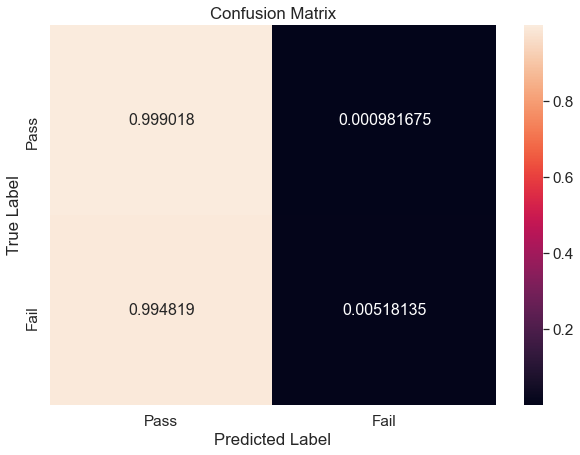

In [24]:
cf_matrix = confusion_matrix(y_validate, logit_pred, normalize = "true")

df_cm = pd.DataFrame(cf_matrix, range(2),
                  range(2))

df_cm = df_cm.rename(index=str, columns={0: "Pass", 1: "Fail"})
df_cm.index = ["Pass", "Fail"]
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Logistic regression does a pretty good job predicting pass but a pretty terrible job predicting fails.

#### Validation for Logistic Regression

In [25]:
range(len(logit_pred))

range(0, 3828)

In [26]:
TP = 0
FP = 0
TN = 0
FN = 0

for i in range(len(logit_pred)): 
    if y_validate[i]==logit_pred[i]==1:
       TP += 1
    if logit_pred[i]==1 and y_validate[i]!=logit_pred[i]:
       FP += 1
    if y_validate[i]==logit_pred[i]==0:
       TN += 1
    if logit_pred[i]==0 and logit_pred[i]!=y_validate[i]:
       FN += 1

In [27]:
accuracy = (TP + TN)/(TP + TN + FP + FN)
print("Accuracy is", accuracy)

Accuracy is 0.79858934169279


In [28]:
precision = TP/(TP + FP)
print("Precision is", precision)

Precision is 0.5714285714285714


In [29]:
recall = TP/(TP + FN)
print("Recall is", recall)

Recall is 0.0051813471502590676


In [30]:
f1 = 2 * (precision * recall)/(precision + recall)
print("F1 Score is", f1)

F1 Score is 0.010269576379974325


### Model 3 - Decision Tree

##### About Decision trees: 

Decision trees use a series of if/then rules to infer from the data and predict the values of new variables. 

Pros: Decision trees are simple, do not require a lot of prior processing or data manipulation, and are very transparent: they're easy to validate, and to interpret. 
    They also don't make assumptions about the shape or form of the data.
    
Cons: Decision trees can overfit the data, and can create biased trees if the data is not balanced. 

#### Hyperparameter Tuning Using Grid Search for Decision Tree

In [31]:
# using grid search CV to fine tune hyperparameters

dt_classifier_test = tree.DecisionTreeClassifier()

param_grid = {'max_depth': [5, 10, 15],
             'min_samples_split': [2, 4, 6, 8, 10],
             'max_features': [5, 10, 15]} 

In [32]:

dt_grid = GridSearchCV(dt_classifier_test, param_grid, cv = 3)
dt_grid.fit(X, y)
dt_grid

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 10, 15], 'max_features': [5, 10, 15],
                         'min_samples_split': [2, 4, 6, 8, 10]})

In [33]:
print('Best max depth:', dt_grid.best_estimator_.get_params()['max_depth'])
print('Best min samples split:', dt_grid.best_estimator_.get_params()['min_samples_split'])
print('Best max leaf nodes:', dt_grid.best_estimator_.get_params()['max_leaf_nodes'])


Best max depth: 5
Best min samples split: 2
Best max leaf nodes: None


#### Finding best hyperparameters and re-fitting the model

In [21]:

dt_classifier = tree.DecisionTreeClassifier(criterion='gini',  # or 'entropy' for information gain
                       splitter='best',  # or 'random' for random best split
                       max_depth=5,  # how deep tree nodes can go
                       min_samples_split=6,  # samples needed to split node
                       min_samples_leaf=1,  # samples needed for a leaf
                       min_weight_fraction_leaf=0.0,  # weight of samples needed for a node
                       max_features=None,  # number of features to look for when splitting
                       max_leaf_nodes=None,  # max nodes
                       min_impurity_decrease=1e-07, #early stopping
                       random_state = 10) #random seed

dt_classifier = dt_classifier.fit(X_train, y_train)



In [22]:
print(dt_classifier.score(X_train, y_train))

0.8036227466689889


In [23]:
print(dt_classifier.score(X_validate, y_validate))

0.7938871473354232


In [24]:
dt_pred = dt_classifier.predict(X_validate)

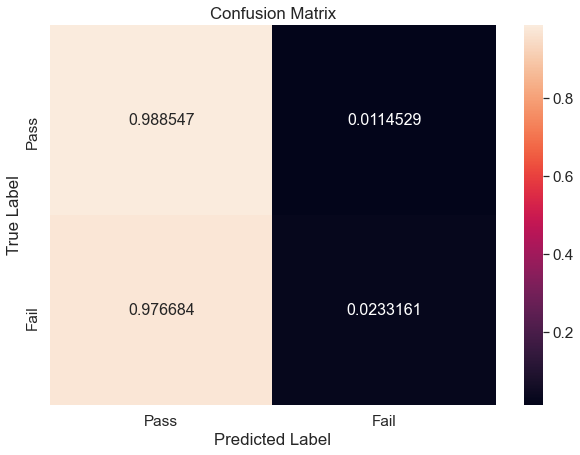

In [25]:
cf_matrix = confusion_matrix(y_validate, dt_pred, normalize = "true")

df_cm = pd.DataFrame(cf_matrix, range(2),
                  range(2))

df_cm = df_cm.rename(index=str, columns={0: "Pass", 1: "Fail"})
df_cm.index = ["Pass", "Fail"]
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#### Validation for Decision Tree

In [26]:
range(len(dt_pred))

range(0, 3828)

In [27]:
TP = 0
FP = 0
TN = 0
FN = 0

for i in range(len(dt_pred)): 
    if y_validate[i]==dt_pred[i]==1:
       TP += 1
    if dt_pred[i]==1 and y_validate[i]!=dt_pred[i]:
       FP += 1
    if y_validate[i]==dt_pred[i]==0:
       TN += 1
    if dt_pred[i]==0 and dt_pred[i]!=y_validate[i]:
       FN += 1

Accuracy:

In [28]:
accuracy = (TP + TN)/(TP + TN + FP + FN)
print("Accuracy is", accuracy)

Accuracy is 0.7938871473354232


Precision:

In [29]:
precision = TP/(TP + FP)
print("Precision is", precision)

Precision is 0.33962264150943394


Recall:

In [30]:
recall = TP/(TP + FN)
print("Recall is", recall)

Recall is 0.023316062176165803


In [31]:
f1 = 2 * (precision * recall)/(precision + recall)
print("F1 Score is", f1)

F1 Score is 0.04363636363636363


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.599


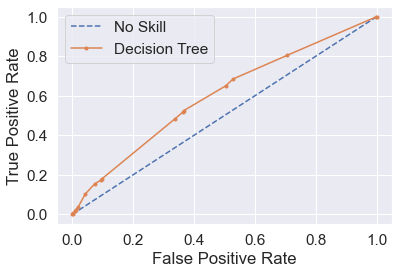

In [33]:
# roc curve and auc

# split into train/test sets
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_validate))]


# predict probabilities for dt
dt_probs = dt_classifier.predict_proba(X_validate)

# keep probabilities for the positive outcome only
dt_probs = dt_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_validate, ns_probs)
dt_auc = roc_auc_score(y_validate, dt_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (dt_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_validate, ns_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_validate, dt_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

#### Which of these metrics would you want to prioritize when conducting predictive auditing in this context? Why?

We would prioritize the F1 score as it takes false positives and false negatives into account. In our specific case, where out of public health concerns, false positive – a restaurant that should have failed but passed – are very costly, we want to prioritize precision over recall. Accuracy is less helpful as we have an asymmetric dataset.

## Policy Simulation

### 4.1 Interpretable Machine Learning

**Hint**: Use tools like feature importance plots and coefficient plots

### Model 2 - Logistic Regression

In [46]:
logit_data = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(logit_model.coef_))], axis = 1)
logit_data.columns = ['Feature', 'Coefficient']
logit_data['abs_coef'] = abs(logit_data['Coefficient'])

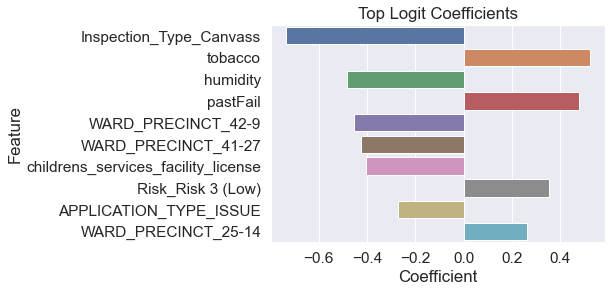

In [47]:
sns.barplot(x="Coefficient", y="Feature", data=logit_data.nlargest(10, 'abs_coef')).set_title("Top Logit Coefficients")
plt.show()

### Model 3 - Decision Tree

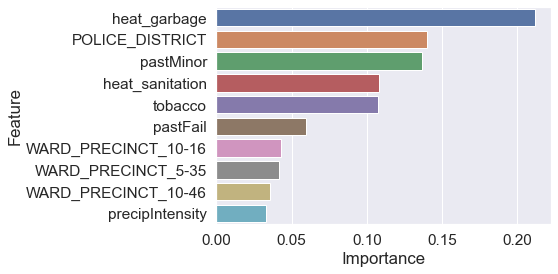

In [48]:
feat_importances = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(dt_classifier.feature_importances_))], axis = 1)
feat_importances.columns = ["Feature", "Importance"]
sns.barplot(x = "Importance", y = "Feature", data = feat_importances.nlargest(10, 'Importance'))
plt.show()

#### Which features contribute to your predictions?

We chose to remove additional variables that we thought might be correlated with the Results, including past counts of serious, critical, and minor violations. 

For the decision tree plot, of the remaining features, we found that heat/garbage contributed most strongly, followed by police district, past minor violation, heat/sanitation, and tobacco. 

For logistic regression, inspection type canvas, tobacco, humidity, and past fails had the greatest importance. These coefficients are on the log scale, so it is difficult to interpret their impact on the outcome. 

Past fails and tobacco both appear across different predictive algorithms.

#### Are there any additional features you wish you could incorporate?
 
 If we could have any additional features, we'd like: average ticket price (or average entree cost);
average hourly wage of servers, managers, hosts, cooks, dishwashers, busboys; number of employees in each category; number of employees eligible for health benefits; employee turnover rate; average ticket price/average hourly wage; corporate vs. privately owned vs. franchise restaurant; elevation above sea level; distance from nearest body of water; age of building; public restroom available y/n; square footage; number of power outages in the last 6 months; residential or commercial street. 

## 4.2 Prioritize Audits

**Hint**: Look up the [`.predict()`](https://www.kite.com/python/docs/sklearn.linear_model.SGDRegressor.predict), [`.predict_proba()`](https://www.kite.com/python/docs/sklearn.linear_model.LogisticRegression.predict_proba), and [`.sample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) methods. Then: 
1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities. 
2. Order your audits by their probability of detecting a "Fail" score
3. Plot your distribution of pass/fail among the first 1000 observations in the dataset
4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1000 observations at random

In [34]:
#predicting probabilities 
dt_probs = dt_classifier.fit(X,y.ravel()).predict_proba(X)

# Predicting the outcome
dt_outcome = dt_classifier.predict(X)

#get probability of failing: 
dt_probs_fail = dt_probs[:,1]


In [35]:
# adding probs_fail and outcome into our dataset

chicago_inspections_2011_to_2013["dt_probs_fail"] = dt_probs_fail
chicago_inspections_2011_to_2013["dt_outcome"] = dt_outcome

In [36]:
#ordering audits

chicago_inspections_2011_to_2013.sort_values(by = "dt_probs_fail", ascending = False)

,,Facility_Type,Risk,Inspection_Type,Results,Facility_Type_Clean,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_DESCRIPTION,APPLICATION_TYPE,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,age,age_groups,dt_probs_fail,dt_outcome
Inspection_ID,DBA_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1353913,SHERATON CHICAGO HOTEL & TOWER,Restaurant,Risk 1 (High),Canvass,Fail,Restaurant,1,0,1,3,0.471233,0,42-54,18.0,Retail Food Establishment,RENEW,11.210959,0,0,0,0,0,0,0,0,0,0,0,0,0.001667,69.210000,10.693333,0.660000,23.541843,0.939149,3.453453,11.0,old,1.0,1
1319362,Overton,School,Risk 1 (High),Canvass,Fail,Other,1,0,1,8,0.750685,0,2-30,18.0,Consumption on Premises - Incidental Activity,RENEW,10.720548,0,0,0,0,0,0,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,25.162760,5.852971,29.539860,11.0,old,1.0,1
1230140,NEW YORK PANTRY,Grocery Store,Risk 3 (Low),Canvass,Fail,Other,0,0,0,0,2.000000,1,50-5,24.0,Retail Food Establishment,RENEW,5.712329,0,1,1,0,0,1,0,0,0,0,0,0,0.000000,88.646667,7.453333,0.596667,0.868564,9.982938,2.120574,6.0,middle,1.0,1
1098946,ORIENTAL NOODLE COMPANY,Grocery Store,Risk 1 (High),Canvass,Fail,Other,0,0,0,8,1.495890,0,33-14,17.0,Retail Food Establishment,RENEW,7.441096,0,0,0,0,0,0,0,0,0,0,0,0,0.006993,56.196667,11.090000,0.616667,47.389287,5.772142,24.678280,7.0,middle,1.0,1
1234704,7-ELEVEN,Grocery Store,Risk 2 (Medium),Canvass,Fail,Other,0,0,0,0,2.000000,1,47-20,19.0,Retail Food Establishment,RENEW,7.693151,0,1,1,0,0,0,0,0,0,0,0,0,0.003853,79.553333,7.543333,0.680000,31.456943,17.385000,16.915133,8.0,middle,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1326887,THE FLOWER FLAT,Restaurant,Risk 1 (High),Canvass,Pass,Restaurant,0,0,0,0,2.000000,1,46-3,19.0,Retail Food Establishment,RENEW,4.621918,0,0,0,0,0,1,0,0,0,0,0,0,0.008140,56.590000,13.170000,0.756667,8.835563,4.694171,64.014029,5.0,middle,0.0,0
1214237,VIET HOA PLAZA,Grocery Store,Risk 2 (Medium),Canvass,Pass w/ Conditions,Other,0,0,0,0,2.000000,1,48-55,20.0,Retail Food Establishment,RENEW,9.693151,0,0,0,0,0,1,0,0,0,0,0,0,0.000277,47.926667,15.516667,0.623333,36.429057,3.621719,51.831458,10.0,old,0.0,0
517739,Asado Coffee Company,Restaurant,Risk 2 (Medium),Canvass,Pass,Restaurant,0,0,0,0,2.000000,1,47-24,19.0,Retail Food Establishment,RENEW,3.126027,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,34.586667,11.373333,0.683333,18.793415,2.590047,62.408084,3.0,young,0.0,0


In [37]:
#selecting out the first 1000 rows
first_1000 = chicago_inspections_2011_to_2013.iloc[0:999]

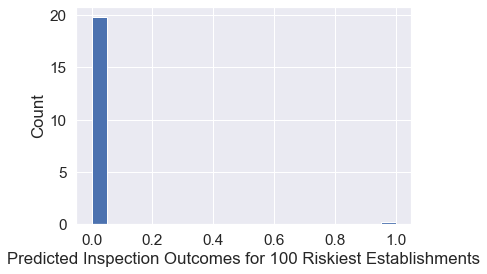

In [38]:
#recoding first 1000 rows as 0 and 1
first_1000.loc[first_1000['dt_outcome'] == 0]
first_1000.loc[first_1000['dt_outcome'] == 1]

# plot distribution of pass/fail among observations
x = first_1000['dt_outcome']
plt.hist(x, density=True, bins=20)  # `density=False` would make counts
plt.ylabel('Count')
plt.xlabel('Predicted Inspection Outcomes for 100 Riskiest Establishments');

As expected, our model predicts that the vast majority of establishments will pass inspection.



In [39]:
#get fits 1000 outcome predictions
dt_outcome_first1000 = first_1000['dt_outcome']

#select first 1000 results
y_first_1000 = first_1000['Results']

y_first_1000 = first_1000['Results'].replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y_first_1000 = lb_style.fit_transform(y_first_1000)
# Recode 0s and 1s so 1s are "Fail"
y_first_1000 = np.where(y_first_1000 == 1, 0 ,1)

In [40]:
# plotting metrics of 1000 outcome predictions 

TP = 0
FP = 0
TN = 0
FN = 0

for i in range(len(dt_outcome_first1000)): 
    if y_first_1000[i]==dt_outcome_first1000[i]==1:
       TP += 1
    if dt_outcome_first1000[i]==1 and y_first_1000[i]!=dt_outcome_first1000[i]:
       FP += 1
    if y_first_1000[i]==dt_outcome_first1000[i]==0:
       TN += 1
    if dt_outcome_first1000[i]==0 and dt_outcome_first1000[i]!=y_first_1000[i]:
       FN += 1

In [41]:
accuracy = (TP + TN)/(TP + TN + FP + FN)
print("Accuracy is", accuracy)

Accuracy is 0.7667667667667668


In [42]:
precision = TP/(TP + FP)
print("Precision is", precision)

Precision is 1.0


In [43]:
recall = TP/(TP + FN)
print("Recall is", recall)

Recall is 0.0371900826446281


In [44]:
f1 = 2 * (precision * recall)/(precision + recall)
print("F1 Score is", f1)

F1 Score is 0.07171314741035857


In [45]:
# create a random sample of 1000 establishments

random_chicago = chicago_inspections_2011_to_2013.sample(1000)

In [46]:
# recreate variables for random sample of 1000 establishments

random_outcomes = random_chicago['dt_outcome']

y_random = random_chicago['Results']

y_random = random_chicago['Results'].replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y_random = lb_style.fit_transform(y_random)
# Recode 0s and 1s so 1s are "Fail"
y_random = np.where(y_random == 1, 0 ,1)

In [47]:
# plotting metrics for random sample of 1000 establishments

TP = 0
FP = 0
TN = 0
FN = 0

for i in range(len(random_outcomes)): 
    if y_random[i]==random_outcomes[i]==1:
       TP += 1
    if random_outcomes[i]==1 and y_random[i]!=random_outcomes[i]:
       FP += 1
    if y_random[i]==random_outcomes[i]==0:
       TN += 1
    if random_outcomes[i]==0 and random_outcomes[i]!=y_random[i]:
       FN += 1

In [48]:
accuracy = (TP + TN)/(TP + TN + FP + FN)
print("Accuracy is", accuracy)

Accuracy is 0.786


In [49]:
precision = TP/(TP + FP)
print("Precision is", precision)

Precision is 1.0


In [50]:
recall = TP/(TP + FN)
print("Recall is", recall)

Recall is 0.03167420814479638


In [51]:
f1 = 2 * (precision * recall)/(precision + recall)
print("F1 Score is", f1)

F1 Score is 0.06140350877192983


The predictive model performs slightly better than a random sample of observations, using our F1 score as a means of comparison.

### Predict on Data with Unseen Labels

In [52]:
# Fill in the code below with the X data you used for training
X_test = chicago_inspections_2014[chicago_inspections_2014.columns & X_train.columns]
X_test = X_test.dropna()

In [54]:
#predicting on unseen data
#unseen_pred = dt_classifier.predict(X_test)

#we were unable to run this model prediction because the number of features in the chicago_inspection_2014 dataset (74) was
# far smaller than the 2009 features in our X data used for training.

ValueError: Number of features of the model must match the input. Model n_features is 2009 and input n_features is 24 

### 5.1: Why do we need metrics beyond accuracy when us- ing machine learning in the social sciences and public policy?

Accuracy works well when your data is symmetric (I.e. your true negatives and true positives are evenly distributed).  This is not always the case in real-life situations (e.g. public health rare disease example where true negatives are much more significant than true positives). In these instances, accuracy will be skewed, and thus we would want to look at other validation metrics. While all four performance metric are important, context matters for which metrics to prioritize — specifically weighting costs of false positives vs. false negatives.  In our scenario of probability of inspection pass/fails, we concluded that we would want to minimize false positives (I.e. likelihood of business being predicted as passing when it actually failed), so we prioritized precision over recall. 


### 5.2 Imagine that establishments learned about the algorithm being used to determine who gets audited and they started adjusting their behavior (and changing certain key features about themselves that were important for the prediction) to avoid detection. How could policymakers address this interplay between algorithmic decisionmaking and real world behavior?

Refining your algorithm annually and publicizing this continual refinement might help mitigate some of these establishment's focusing on certain features they think are most important. Continuing to conduct a certain number of random audits would also likely work to keep restaurants on their toes. Developing incentives or penalties for certain features even if not in the algorithm (e.g. if one year tobacco is not in the algorithm and yet the City wishes to encourage tobacco-free establishments and thus might institute incentives or penalties to promote behavior change). 